In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

navoneel_brain_mri_images_for_brain_tumor_detection_path = kagglehub.dataset_download('navoneel/brain-mri-images-for-brain-tumor-detection')
phylake1337_fire_dataset_path = kagglehub.dataset_download('phylake1337/fire-dataset')
baidurjya_brainn_path = kagglehub.dataset_download('baidurjya/brainn')

print('Data source import complete.')


In [ ]:
from torchvision import datasets, transforms

In [ ]:
transform = transforms.Compose([
    transforms.Resize((120,120)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])
dataset = datasets.ImageFolder(root = '/kaggle/input/fire-dataset/fire_dataset', transform = transform)
class_names = dataset.classes

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(100, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(120, 120, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(50, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(10, activation='relu'),
    Dense(2, activation='softmax')  # Adjust for binary classification
])


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/fire-dataset/fire_dataset',
    target_size=(120, 120),
    batch_size=32,
    class_mode='categorical'  # Adjust for your classification type
)

validation_generator = test_datagen.flow_from_directory(
    '/kaggle/input/fire-dataset/fire_dataset',
    target_size=(120, 120),
    batch_size=32,
    class_mode='categorical'  # Adjust for your classification type
)


Found 999 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs= 5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/5
32/32 [==============================] - 192s 6s/step - loss: 0.2802 - accuracy: 0.8789 - val_loss: 0.1256 - val_accuracy: 0.9560
Epoch 2/5
32/32 [==============================] - 179s 6s/step - loss: 0.1739 - accuracy: 0.9339 - val_loss: 0.1198 - val_accuracy: 0.9510
Epoch 3/5
32/32 [==============================] - 177s 6s/step - loss: 0.1160 - accuracy: 0.9560 - val_loss: 0.0968 - val_accuracy: 0.9600
Epoch 4/5
32/32 [==============================] - 177s 6s/step - loss: 0.1049 - accuracy: 0.9650 - val_loss: 0.0897 - val_accuracy: 0.9670
Epoch 5/5
32/32 [==============================] - 176s 6s/step - loss: 0.0931 - accuracy: 0.9610 - val_loss: 0.1292 - val_accuracy: 0.9439


In [ ]:
test_loss, test_accuracy = model.evaluate(validation_generator, steps=len(validation_generator))
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


32/32 [==============================] - 80s 3s/step - loss: 0.1292 - accuracy: 0.9439
Test Loss: 0.12924671173095703, Test Accuracy: 0.9439439177513123


In [ ]:
import numpy as np
from keras.preprocessing import image

img_path = '/kaggle/input/fire-dataset/fire_dataset/non_fire_images/non_fire.114.png'
img = image.load_img(img_path, target_size=(120, 120))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale to [0, 1]

predicted_class = model.predict(img_array)
print(predicted_class)
if(predicted_class[0][1]>predicted_class[0][0]):
    index = 1
else:
    index = 0
print(class_names[index])

[[9.189008e-05 9.999081e-01]]
non_fire_images


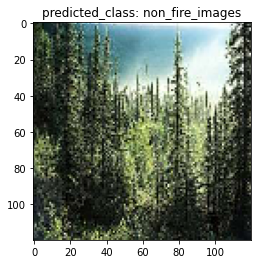

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(f'predicted_class: {class_names[index]}')
plt.show()